In [62]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
import itertools
import numpy as np
import utils
import copy

from collections import defaultdict as ddict
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib
matplotlib.rcParams.update({'font.size': 32})
from matplotlib import pyplot as plt

from random import choices

In [55]:
sd_path = "../scores_dicts/abs_ours.pkl"
sd = utils.get_pickle(sd_path)

In [64]:
sd_path = "../scores_dicts/ext_ours.pkl"
sd = utils.get_pickle(sd_path)

# To analyze mix of ext and abs summaries, load both and merge

In [383]:
sd_abs_path = "../scores_dicts/abs_ours.pkl"
sd_ext_path = "../scores_dicts/ext_ours.pkl"
sd_abs = utils.get_pickle(sd_abs_path)
sd_ext = utils.get_pickle(sd_ext_path)
sd = copy.deepcopy(sd_abs)
for doc_id in sd:
    isd_sota_ext = sd_ext[doc_id]
    # isd_sota_ext['system_summaries']['bart_out_ext.txt'] = isd_sota_ext['system_summaries']['bart_out.txt']
    sd[doc_id]['system_summaries'].update(isd_sota_ext['system_summaries'])

# Data exploration

In [349]:
sd.keys()
len(sd)

dict_keys([52, 2, 23, 62, 6, 92, 73, 47, 86, 32, 67, 42, 36, 3, 50, 35, 17, 45, 16, 48, 95, 91, 89, 85, 74, 28, 49, 58, 12, 33, 14, 9, 8, 29, 43, 39, 38, 84, 57, 31, 21, 71, 15, 24, 78, 5, 90, 87, 51, 40, 1, 46, 66, 56, 7, 88, 72, 77, 34, 68, 26, 64, 18, 76, 30, 80, 61, 99, 79, 41, 27, 94, 22, 4, 82, 0, 10, 37, 25, 60, 70, 13, 19, 75, 69, 54, 65, 81, 98, 11, 55, 44, 59, 20, 83, 96, 97, 93, 53, 63])

100

### print score ranges

In [391]:
utils.print_score_ranges(sd)

                                                     min    25-perc     median    75-perc        max       mean
---------------------------------------------  ---------  ---------  ---------  ---------  ---------  ---------
bert_f_score                                   -0.351825   0.195220   0.275902   0.349164   0.932561   0.271265
bert_precision_score                           -0.254846   0.132720   0.219541   0.304194   0.943010   0.219621
bert_recall_score                              -0.459320   0.231238   0.325338   0.407820   0.921930   0.322646
js-2                                           -0.693147  -0.602217  -0.550010  -0.495647  -0.120117  -0.541467
litepyramid_recall                              0.000000   0.384615   0.500000   0.600000   1.000000   0.503789
metric_bert_score_f1                            0.377064   0.588862   0.626794   0.669662   0.880643   0.629579
metric_bert_score_precision                     0.383562   0.559930   0.600239   0.648717   0.949825   0

## how many summaries per document?

In [65]:
print(np.mean([len(d['system_summaries']) for d in sd.values()]))

11.0


In [5]:
len(sd)

100

## what metrics found for each document?

In [41]:
mlist = utils.get_metrics_list(sd)
mlist

['bert_f_score',
 'bert_precision_score',
 'bert_recall_score',
 'js-2',
 'litepyramid_recall',
 'metric_bert_score_f1',
 'metric_bert_score_precision',
 'metric_bert_score_recall',
 'metric_blanc',
 'metric_bleu',
 'metric_cider',
 'metric_meteor',
 'metric_mover_score',
 'metric_s3_pyr',
 'metric_s3_resp',
 'metric_summaqa_avg_fscore',
 'metric_summaqa_avg_prob',
 'metric_supert',
 'mover_score',
 'ours_big_patent_sent_delete',
 'ours_big_patent_sent_replace',
 'ours_big_patent_word_add',
 'ours_big_patent_word_cross',
 'ours_big_patent_word_delete',
 'ours_big_patent_word_replace',
 'ours_billsum_sent_delete',
 'ours_billsum_sent_replace',
 'ours_billsum_word_add',
 'ours_billsum_word_cross',
 'ours_billsum_word_delete',
 'ours_billsum_word_replace',
 'ours_cnn_dailymail_sent_delete',
 'ours_cnn_dailymail_sent_replace',
 'ours_cnn_dailymail_word_add',
 'ours_cnn_dailymail_word_cross',
 'ours_cnn_dailymail_word_delete',
 'ours_cnn_dailymail_word_replace',
 'ours_scientific_papers_sen

## Filter out some metrics if reqd

In [66]:
mlist = [
    #'bert_f_score', , 'bert_precision_score', 
    # 'metric_bert_score_f1', 'metric_bert_score_recall', 'metric_bert_score_precision',
     'ours_big_patent_sent_delete',
     #'ours_big_patent_sent_replace',
     #'ours_big_patent_word_add',
     #'ours_big_patent_word_cross',
     #'ours_big_patent_word_delete',
     #'ours_big_patent_word_replace',
     'ours_billsum_sent_delete',
     #'ours_billsum_sent_replace',
     #'ours_billsum_word_add',
     #'ours_billsum_word_cross',
     #'ours_billsum_word_delete',
     #'ours_billsum_word_replace',
     #'ours_cnn_dailymail_sent_delete',
     #'ours_cnn_dailymail_sent_replace',
     #'ours_cnn_dailymail_word_add',
     #'ours_cnn_dailymail_word_cross',
     #'ours_cnn_dailymail_word_delete',
     #'ours_cnn_dailymail_word_replace',
     'ours_scientific_papers_sent_delete',
     #'ours_scientific_papers_sent_replace',
     #'ours_scientific_papers_word_add',
     #'ours_scientific_papers_word_cross',
     #'ours_scientific_papers_word_delete',
     #'ours_scientific_papers_word_replace',
    'rouge_1_recall',
    'rouge_2_recall',
    #'rouge_l_recall',
    'mover_score',
    # 'metric_mover_score',
    'bert_recall_score',
    #'js-2',
    # 'metric_bleu',
    #'metric_cider',
    'metric_meteor',
    'metric_s3_pyr',
    # 'metric_s3_resp',
    'metric_blanc',
    'metric_summaqa_avg_fscore',
    #'metric_summaqa_avg_prob',
    'metric_supert',
    # 'ours_scientific_papers_sent_replace_init_bert'#, 'mover_score', 'rouge_1_recall', 'rouge_2_recall', 'rouge_l_recall', 'js-2'
    'litepyramid_recall']

In [67]:
systems = utils.get_system_level_scores(sd, mlist, agg='mean')
len(systems)
systems

11

defaultdict(<function utils.get_system_level_scores.<locals>.<lambda>()>,
            {'neusumm_out.txt': defaultdict(list,
                         {'ours_big_patent_sent_delete': 0.8220220819999998,
                          'ours_billsum_sent_delete': 0.8845556079999999,
                          'ours_scientific_papers_sent_delete': 0.6872253786,
                          'rouge_1_recall': 0.5384382999999999,
                          'rouge_2_recall': 0.24043019999999998,
                          'mover_score': 0.270426881019545,
                          'bert_recall_score': 0.33228876680135727,
                          'metric_meteor': 0.22606107632788372,
                          'metric_s3_pyr': 0.5819094544407306,
                          'metric_blanc': 0.14250778497277794,
                          'metric_summaqa_avg_fscore': 0.19155342329968833,
                          'metric_supert': 0.7298771378780138,
                          'litepyramid_recall': 0.47441637529

# System level analysis - Exp II

<Figure size 432x324 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, "Pearson's correlation")

(-0.8, 1.0)

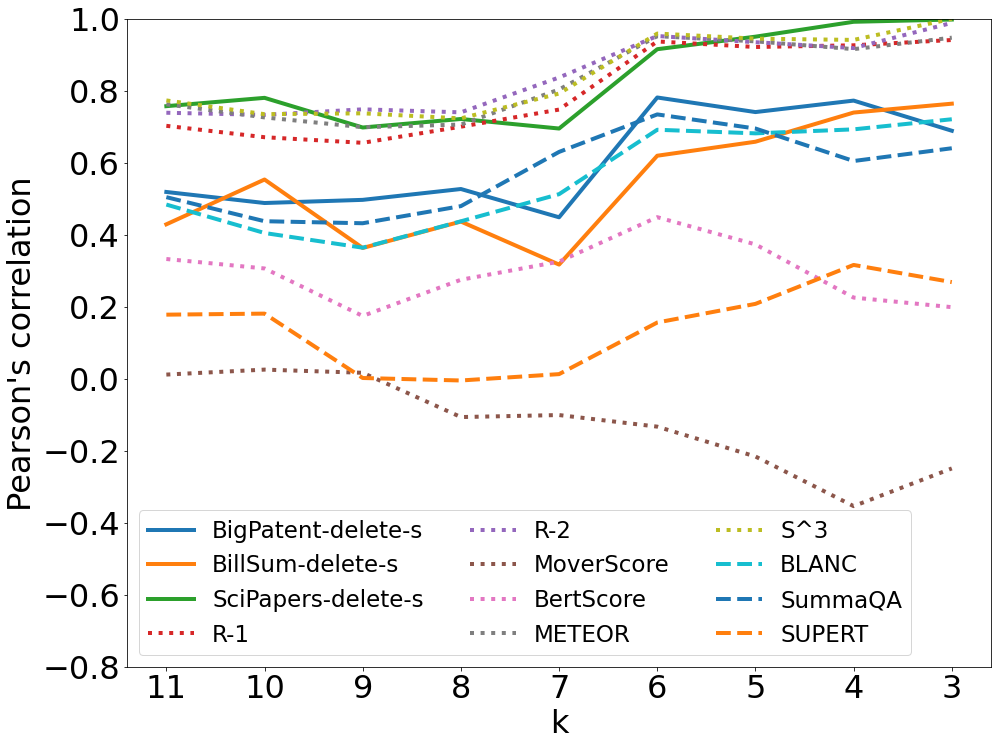

In [107]:
# plot k vs disagreements
kvalues = np.arange(len(systems), 2, -1)
# kvalues = [14, 12, 10, 8, 6, 4]
# kvalues = [11, 8, 6, 4]
# kvalues = [25, 20, 16, 12, 8, 6, 4]
all_pairs = [('litepyramid_recall', m) for m in mlist if m != 'litepyramid_recall']
systems = utils.get_system_level_scores(sd, mlist, agg='mean')
sorting_metric = 'litepyramid_recall'
correlation_method = 'pearson'

ours = {'ours_big_patent_sent_delete' :'BigPatent-delete-s',
        'ours_big_patent_word_delete' : 'BigPatent-delete-w',
        'ours_big_patent_word_replace' : 'BigPatent-replace-w',
        #'ours_big_patent_sent_replace',
        'ours_billsum_sent_delete' : 'BillSum-delete-s',
        'ours_billsum_word_delete' : 'BillSum-delete-w',
        'ours_billsum_word_replace' : 'BillSum-replace-w',
        #'ours_billsum_sent_replace',
        #'ours_cnn_dailymail_sent_delete' : 'OCNNDM',
        #'ours_cnn_dailymail_sent_delete' : 'Ours_CNNDM',
        #'ours_cnn_dailymail_sent_delete' : 'Ours_CNNDM',
        #'ours_cnn_dailymail_sent_replace',
        'ours_scientific_papers_sent_delete': 'SciPapers-delete-s',
        'ours_scientific_papers_word_delete': 'SciPapers-delete-w',
        'ours_scientific_papers_word_replace': 'SciPapers-replace-w'}

upperbound = {
    'rouge_1_recall' : 'R-1',
    'rouge_2_recall' : 'R-2',
    #'rouge_l_recall',
    'mover_score' : 'MoverScore',
    # 'metric_mover_score',
    'bert_recall_score': "BertScore",
    # 'js-2',
    # 'metric_bleu',
    #'metric_cider',
    'metric_meteor' : "METEOR",
    'metric_s3_pyr' : "S^3"}

reffree = {
    'metric_blanc' : "BLANC" ,
    'metric_summaqa_avg_fscore' : "SummaQA",
    # 'metric_summaqa_avg_prob',
    'metric_supert': "SUPERT"}

y = ddict(list)

def checkLabel(l, ldict):
    for label in ldict:
        if l.find(label) != -1:
            return ldict[label]
    return False

for k in kvalues:
    top_ksystems = utils.get_topk(systems, k, metric=sorting_metric)
    corr, pval = utils.get_correlation(top_ksystems, metric_pairs=all_pairs, method=correlation_method)
    for key in corr:
        subs = [checkLabel(key, ldict) for ldict in [ours, upperbound, reffree] ]
        subs = subs[0] or subs[1] or subs[2]
        y[subs].append(corr[key])
        
data = {
    'x': kvalues,
    **y,
}
labels = list(y.keys())
#for label in labels:
#    print (label)

plt.figure(figsize=(6, 4.5))
ax = plt.axes([0, 0, 2, 2])
lines = []
for label in labels:
    #print(label, checkLabel(label,ours))
    if label in ours.values():
        lines.append(ax.plot('x', label, data=data, linewidth=4.0, 
                         linestyle='solid'))
    elif label in upperbound.values():
        lines.append(ax.plot('x', label, data=data, linewidth=4.0, 
                         linestyle='dotted'))
    else:
        lines.append(ax.plot('x', label, data=data, linewidth=4.0, 
                         linestyle='dashed'))
    # print(data[label][0])
plt.gca().invert_xaxis()
ax.set_xticks(kvalues)
#ax.set_yticks(np.arange(-1, 1.1, 0.5))
plt.legend(loc='best', ncol=3, fontsize=23)
ax.set_xlabel(f"k")#, fontsize=20)
ax.set_ylabel(f"Pearson's correlation")#, fontsize=20)
plt.ylim(-0.8,1)
plt.savefig("fig.pdf", bbox_inches="tight")

<Figure size 72x144 with 0 Axes>

(0.0, 1.0, 0.0, 1.0)

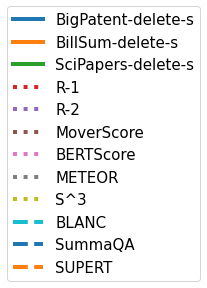

In [58]:
# add the legend from the previous axes
plt.figure(figsize=(1, 2))
plt.legend(*ax.get_legend_handles_labels(), loc='center', prop={'size': 15})
# hide the axes frame and the x/y labels
plt.axis('off')
plt.savefig('legend.pdf', bbox_inches="tight")

# Other correlation

In [26]:
from scipy.stats.stats import pearsonr, spearmanr, kendalltau
all_pairs = [('litepyramid_recall', m) for m in mlist if m != 'litepyramid_recall']
level="pool"

def calc_corr(level, method, pair):
    corr = 0
    if level == "pool":
        x = []
        y = []
        for doc_id in sd:
            for sys_name, sys in sd[doc_id]["system_summaries"].items():
                x.append(sys["scores"][pair[0]])
                y.append(sys["scores"][pair[1]])
        corr = method(x, y)[0]
    elif level == "summary":
        for doc_id in sd:
            x = [sys["scores"][pair[0]] for sys_name, sys in sd[doc_id]["system_summaries"].items()]
            y = [sys["scores"][pair[1]] for sys_name, sys in sd[doc_id]["system_summaries"].items()]
            corr += method(x, y)[0]
        corr /= len(sd)
    elif level == 'system':
        x = [scores[pair[0]] for sys_name, scores in systems.items()]
        y = [scores[pair[1]] for sys_name, scores in systems.items()]
        corr = method(x, y)[0]
    else:
        print("???")
    return corr

for pair in all_pairs: print(pair)
for pair in all_pairs:
    for method in [pearsonr, spearmanr, kendalltau]:
        corr = calc_corr(level, method, pair)
        print("%.4f" % corr, end=" ")
    
    print("")

('litepyramid_recall', 'ours_big_patent_sent_delete')
('litepyramid_recall', 'ours_big_patent_word_delete')
('litepyramid_recall', 'ours_big_patent_word_replace')
('litepyramid_recall', 'ours_billsum_sent_delete')
('litepyramid_recall', 'ours_billsum_word_delete')
('litepyramid_recall', 'ours_billsum_word_replace')
('litepyramid_recall', 'ours_scientific_papers_sent_delete')
('litepyramid_recall', 'ours_scientific_papers_word_delete')
('litepyramid_recall', 'ours_scientific_papers_word_replace')
('litepyramid_recall', 'metric_blanc')
('litepyramid_recall', 'metric_summaqa_avg_fscore')
('litepyramid_recall', 'metric_summaqa_avg_prob')
('litepyramid_recall', 'metric_supert')
0.1558 0.1292 0.0886 
-0.0227 0.0014 0.0014 
0.0302 -0.0251 -0.0175 
0.0824 0.0969 0.0676 
0.0042 0.0524 0.0353 
0.0643 0.0279 0.0186 
0.0877 0.0857 0.0594 
0.0321 0.0177 0.0121 
0.0402 -0.0518 -0.0358 
0.1735 0.1865 0.1303 
0.0913 0.1098 0.0762 
0.1114 0.1236 0.0867 
0.1047 0.1084 0.0746 


# Williams

In [39]:
import os

level = 'pool'
sample_size = len(sd) * len(systems) if level == 'pool' else len(systems)
metricsA = [
     'ours_big_patent_sent_delete',
     'ours_big_patent_word_delete',
     'ours_big_patent_word_replace',
     'ours_billsum_sent_delete',
     'ours_billsum_word_delete',
     'ours_billsum_word_replace',
     'ours_scientific_papers_sent_delete',
     'ours_scientific_papers_word_delete',
     'ours_scientific_papers_word_replace',
]

metricsB = [
    'metric_blanc',
    'metric_summaqa_avg_fscore',
    'metric_summaqa_avg_prob',
    'metric_supert'
]

# metricsA = metricsB = mlist

pairA = [('litepyramid_recall', m) for m in metricsA if m != 'litepyramid_recall']
pairB = [('litepyramid_recall', m) for m in metricsB if m != 'litepyramid_recall']
pairALL = pairA + pairB

scores = {}

for p in pairALL:
    scores[p] = calc_corr(level, pearsonr, p)
    

for p1 in pairA:
    for p2 in pairB:
        if scores[p1] <= scores[p2]:
            continue
        p12 = (p1[1], p2[1])
        print(p12)
        scores[p12] = calc_corr(level, pearsonr, p12)
        
        os.system("Rscript ../williams_test_data/nlp-williams/williams.R %f %f %f %d" % (scores[p1], scores[p2], scores[p12], sample_size))

('ours_big_patent_sent_delete', 'metric_summaqa_avg_fscore')
----------------------------------------- 
Williams Test for Increase in Correlation 

    r12 correlation( human, metric_a ) :  0.281035 
    r13 correlation( human, metric_b ) : 0.185097 
    r23 correlation( metric_a, metric_b) : 0.189692 

    Sample size: 1400 


P-value: 0.00166852324325283 
----------------------------------------- 


0

('ours_big_patent_sent_delete', 'metric_summaqa_avg_prob')
----------------------------------------- 
Williams Test for Increase in Correlation 

    r12 correlation( human, metric_a ) :  0.281035 
    r13 correlation( human, metric_b ) : 0.211246 
    r23 correlation( metric_a, metric_b) : 0.203161 

    Sample size: 1400 


P-value: 0.0153390758001599 
----------------------------------------- 


0

('ours_billsum_sent_delete', 'metric_summaqa_avg_fscore')
----------------------------------------- 
Williams Test for Increase in Correlation 

    r12 correlation( human, metric_a ) :  0.197408 
    r13 correlation( human, metric_b ) : 0.185097 
    r23 correlation( metric_a, metric_b) : 0.164799 

    Sample size: 1400 


P-value: 0.357340234622489 
----------------------------------------- 


0

('ours_scientific_papers_sent_delete', 'metric_summaqa_avg_fscore')
----------------------------------------- 
Williams Test for Increase in Correlation 

    r12 correlation( human, metric_a ) :  0.229848 
    r13 correlation( human, metric_b ) : 0.185097 
    r23 correlation( metric_a, metric_b) : 0.092669 

    Sample size: 1400 


P-value: 0.0998168461535601 
----------------------------------------- 


0

('ours_scientific_papers_sent_delete', 'metric_summaqa_avg_prob')
----------------------------------------- 
Williams Test for Increase in Correlation 

    r12 correlation( human, metric_a ) :  0.229848 
    r13 correlation( human, metric_b ) : 0.211246 
    r23 correlation( metric_a, metric_b) : 0.086456 

    Sample size: 1400 


P-value: 0.296821018145753 
----------------------------------------- 


0